In [50]:
library(tidyverse)
library(tidyr)
library(rlang)
library(modules)
library(outliers)
library(car)
library(survival)
library(survminer)
setwd('C:/Users/iceca/Documents/Housing_Regression')
fig.directory <- 'Exploration_and_Visualization/Figures_and_Graphs/'

m <- modules::use("Helpers/Loading_Data.R")
m <- m$load.train

get.file.name= function(x,y) {
    paste(fig.directory, x,"/", y,".png", sep="")
}

Warning message in library(modules):
"Packages loaded with 'library' may not be available inside a module. For loading packages in a module, use 'import' instead."Warning message in library(rlang):
"Packages loaded with 'library' may not be available inside a module. For loading packages in a module, use 'import' instead."

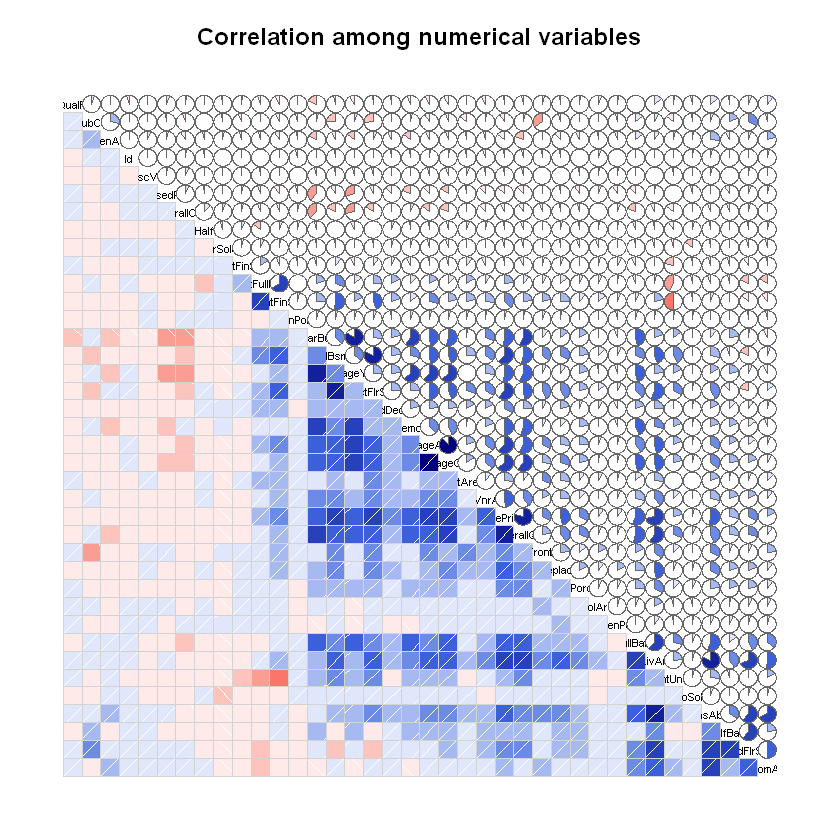

In [51]:
nums <-m$combine.columns( list(m$nums.data(), m$get.labels())) #%>% m$load.train$drop.id()
nums.standard <- m$combine.columns( list(m$nums.data.standardize(), m$get.labels()))
library(corrgram)
corrgram(nums, order=TRUE, lower.panel=panel.shade,
  upper.panel=panel.pie, text.panel=panel.txt,
  main="Correlation among numerical variables")

In [52]:
#things learned: overall quality depends on area, year the home was built
#variables within same part of the home are highly correlated
#variables that deal with area are highly correlated
#garage area is Very correlated with garage area, so remove one
#GeneralLivingArea and overall house quality are highly correlated with saleprice
cor.dat <- cor(nums) %>% as.data.frame() 
cor.dat %>% mutate(Feature1 = rownames(cor.dat)) %>% gather(-Feature1, key = "Feature2", value = "Correlation") %>% 
    filter(Feature1!=Feature2) %>% filter(Correlation>0.6)
nums$GarageArea == NULL



Feature1,Feature2,Correlation
GarageCars,OverallQual,0.6006707
SalePrice,OverallQual,0.7909816
GarageYrBlt,YearBuilt,0.8381075
GarageYrBlt,YearRemodAdd,0.6294210
BsmtFullBath,BsmtFinSF1,0.6492118
1stFlrSF,TotalBsmtSF,0.8195300
SalePrice,TotalBsmtSF,0.6135806
TotalBsmtSF,1stFlrSF,0.8195300
SalePrice,1stFlrSF,0.6058522
GrLivArea,2ndFlrSF,0.6875011


logical(0)

In [53]:
png(get.file.name ( 'Distribution','Boxplot of features show many outliers'))
boxplot(nums.standard %>% select(-Id, -SalePrice)) 
title(main="Boxplot of features show many outliers", ylab="Values", las=2)
dev.off()

png 
  2

In [54]:
#there is definetely potential for normal distribution, it just that there are outliers that are widening the historgrams
png(get.file.name ('Distribution','Histogram of features show potential for normal distribution, just that there are outliers'))
par(mfrow=c(4,3))
hist(nums$SalePrice)
hist(nums$LotArea)
hist(nums$"1stFlrSF")
hist(nums$YearRemodAdd)
hist(nums$YearBuilt)
hist(nums$'2ndFlrSF')
hist(nums$'OverallQual')
hist(nums$'OverallCond')
hist(nums$GrLivArea)
hist(nums$MSSubClass)
hist(nums$GarageArea)
hist(nums$BedroomAbvGr)
dev.off()

png 
  2

Id,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,BsmtFullBath,BsmtHalfBath,FullBath,TotRmsAbvGrd,Fireplaces,GarageArea,OpenPorchSF,ScreenPorch,PoolArea,SalePrice
0,0.000000e+00,5.182554e-08,0.002430199,6.570238e-05,0.000000e+00,0.409404009,0.000000e+00,0.000000e+00,8.368828e-02,...,0.001225791,4.048028e-01,0.214982812,0.0003817253,0.0001106454,5.299755e-06,1.105438e-04,0.3935546837,0.0000000,0
0,2.331763e-05,3.045127e-01,0.002430199,2.829559e-01,1.507017e-04,0.272703514,1.160266e-03,6.344747e-04,4.344481e-05,...,0.134145150,4.048028e-01,0.004645406,0.0161644552,0.0158010597,5.598875e-02,3.181386e-01,0.3935546837,0.0000000,0
0,2.308429e-02,3.338399e-01,0.002430199,4.182417e-05,4.517039e-03,0.388441936,1.006884e-02,8.641631e-03,2.134031e-01,...,0.134145150,4.048028e-01,0.214982812,0.3833835492,0.2742033539,2.450948e-04,4.900059e-01,0.3935546837,0.4726316,0
0,3.282725e-03,1.546614e-03,0.002430199,1.379739e-04,3.579319e-05,0.240994345,1.158591e-06,1.826014e-07,3.220681e-03,...,0.134145150,4.048028e-01,0.004645406,0.0029476408,0.2742033539,2.737456e-02,3.415916e-08,0.3935546837,0.4726316,0
0,6.170594e-02,1.349125e-01,0.002430199,2.186099e-09,1.337406e-02,0.169995746,8.034088e-04,4.701729e-04,2.454991e-04,...,0.206265217,4.137316e-05,0.004645406,0.0161644552,0.0158010597,4.666415e-02,4.799027e-01,0.3935546837,0.4726316,0
0,2.486842e-01,2.895046e-01,0.018065330,2.817780e-01,3.276576e-01,0.003708628,1.665719e-02,1.604400e-02,1.128828e-01,...,0.206265217,4.048028e-01,0.004645406,0.0029476408,0.2742033539,1.279370e-01,1.773519e-01,0.3935546837,0.4726316,0
0,8.703890e-02,4.049231e-01,0.018065330,1.439827e-04,6.827319e-05,0.168011106,1.889306e-03,9.611586e-04,2.134031e-01,...,0.134145150,4.048028e-01,0.214982812,0.0029476408,0.0158010597,5.239542e-02,3.794486e-01,0.3935546837,0.4726316,0
0,1.481385e-02,5.770815e-03,0.002430199,1.308620e-12,1.939254e-02,0.478129125,2.344566e-02,4.201886e-02,4.621987e-04,...,0.134145150,4.048028e-01,0.004645406,0.0161644552,0.2742033539,5.922120e-02,3.289795e-01,0.3935546837,0.4726316,0
0,4.680843e-02,3.676869e-01,0.018065330,3.814265e-02,1.654356e-01,0.004183077,6.162115e-02,6.981298e-02,4.490760e-02,...,0.206265217,4.048028e-01,0.004645406,0.0003817253,0.2742033539,5.306335e-03,3.143288e-02,0.0007691105,0.4726316,0
0,4.111001e-01,4.787969e-01,0.084776137,3.634512e-02,1.654356e-01,0.002764906,4.646481e-02,5.105045e-02,2.134031e-01,...,0.206265217,4.048028e-01,0.214982812,0.3833835492,0.2742033539,2.429329e-02,4.859173e-01,0.3935546837,0.4726316,0


89  186  314  524  589  692  826  886 1047 1170 1183 1299 1388 1424 
  89  186  314  524  589  692  826  886 1047 1170 1183 1299 1388 1424

Warning message:
"Removed 13 rows containing missing values (geom_point)."

Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,PoolArea,SalePrice
0,5.637537e-02,4.187742e-01,0.012587530,0.0006712977,0.031332014,2.829559e-01,1.654356e-01,3.864819e-01,0.156616635,...,0.3750475432,0.1709061464,0.045509662,0.009089198,1.355346e-02,2.261108e-01,2.406972e-01,3.935547e-01,0.4726316,0
0,1.825874e-01,1.065463e-01,0.002430199,0.0010631034,0.004383989,2.829559e-01,1.654356e-01,3.864819e-01,0.111038873,...,0.0003817253,0.0158010597,0.260703308,0.049605519,4.313121e-02,2.261108e-01,6.552271e-04,1.092126e-12,0.4726316,0
0,1.465339e-04,0.000000e+00,0.257491872,0.3026093554,0.417815055,2.829559e-01,4.127629e-02,8.985780e-07,0.135172747,...,0.1809867089,0.0158010597,0.323497837,0.377687736,4.257730e-01,2.261108e-01,2.406972e-01,3.935547e-01,0.4726316,0
0,3.282725e-03,1.546614e-03,0.002430199,0.3026093554,0.118486797,1.379739e-04,3.579319e-05,3.864819e-01,0.240994345,...,0.0029476408,0.2742033539,0.116920129,0.049605519,2.737456e-02,1.821240e-01,3.415916e-08,3.935547e-01,0.4726316,0
0,4.093366e-01,7.217665e-02,0.213406554,0.0147500275,0.456927878,2.829559e-01,2.688788e-02,3.864819e-01,0.152059482,...,0.1752782577,0.0158010597,0.366860399,0.152411662,4.609223e-01,2.261108e-01,4.919351e-01,2.101945e-01,0.4726316,0
0,6.170594e-02,1.349125e-01,0.002430199,0.3514023905,0.225891078,2.186099e-09,1.337406e-02,3.864819e-01,0.169995746,...,0.0161644552,0.0158010597,0.248117296,0.049605519,4.666415e-02,1.091367e-02,4.799027e-01,3.935547e-01,0.4726316,0
0,2.308429e-02,3.338399e-01,0.002430199,0.3026093554,0.118486797,4.182417e-05,4.517039e-03,3.864819e-01,0.388441936,...,0.3833835492,0.2742033539,0.116920129,0.049605519,2.450948e-04,2.272854e-01,4.900059e-01,3.935547e-01,0.4726316,0
0,1.813895e-01,2.943654e-01,0.018065330,0.3026093554,0.179333959,4.044338e-01,4.089080e-02,3.864819e-01,0.404136573,...,0.1752782577,0.2742033539,0.190339215,0.377687736,4.386424e-01,4.912318e-01,3.909861e-01,3.935547e-01,0.4726316,0
0,2.486842e-01,2.895046e-01,0.018065330,0.3026093554,0.132120622,2.817780e-01,3.276576e-01,3.864819e-01,0.003708628,...,0.0029476408,0.2742033539,0.133055044,0.049605519,1.279370e-01,1.697532e-01,1.773519e-01,3.935547e-01,0.4726316,0
0,1.481385e-02,5.770815e-03,0.002430199,0.3026093554,0.216068254,1.308620e-12,1.939254e-02,3.864819e-01,0.478129125,...,0.0161644552,0.2742033539,0.235863235,0.049605519,5.922120e-02,1.674072e-02,3.289795e-01,3.935547e-01,0.4726316,0


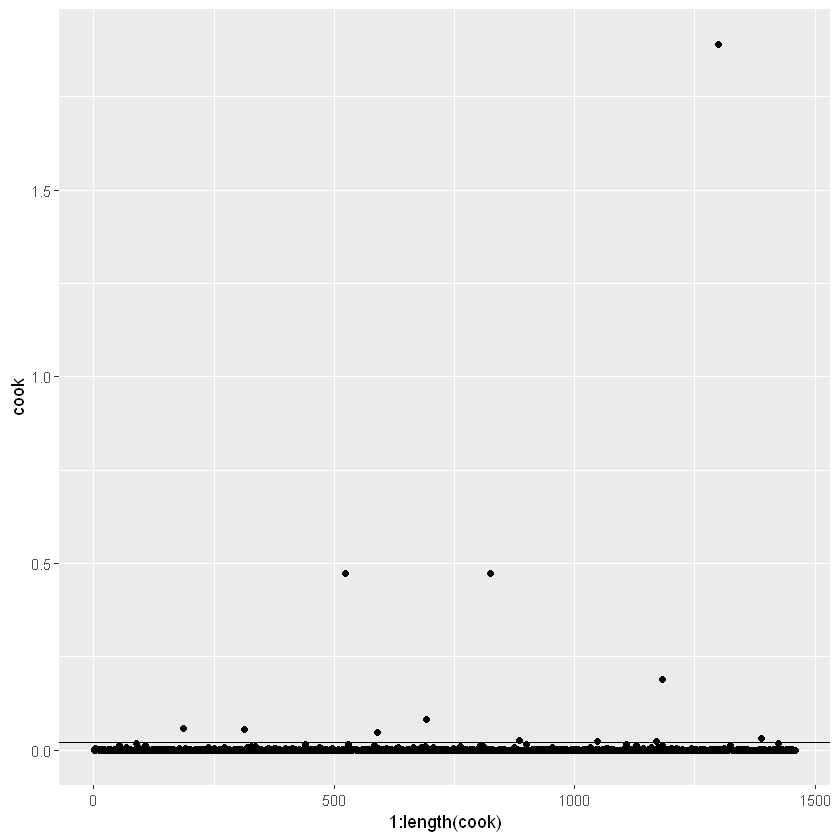

In [55]:
find.p.value <- function(x){ 
    a = pt(x, df=nrow(nums)-1)
    ifelse(a<0.5,a , 1-a) }
linreg <- lm(SalePrice~. , m$combine.columns( list(m$factors.data(), nums.standard)) )

#using bonefftri test, looking at the table of pvalues it detects outliers by homes with unusual area/lot footage,
#many full bath, many garage cars, and/or unsually large pools, ans/or unsually large porches
nums.standard[outlierTest(linreg)$rstudent %>% names() %>% as.numeric(),] %>% 
    mutate_all(find.p.value) %>% select_if(function(x) {min(x)<0.01})

#i will try another test, called the cooks test
#cooks test heavily biased in terms of individual p values, so if one pvalue if extreme then cook labels it as outlier
#there seems to be 3 points that are surely outliers
cook <- cooks.distance(linreg)
mcook <- mean(cook, na.rm=T)
which(cook>0.015)
ggplot(data.frame(cook=cook), aes(x=1:length(cook),y=cook)) + geom_point()+ geom_hline(aes(yintercept=0.02))
nums.standard[which(cook>0.015) %>% as.numeric(),] %>% 
    mutate_all(find.p.value) %>% select_if(function(x) {min(x)<0.01})

#i will classify outliers based on if its index is an outlier in both test
outliers <- intersect(outlierTest(linreg)$rstudent %>% names() %>% as.numeric() %>% sort() , 
          names(which(cook>0.015)) %>% as.numeric() %>% sort())

#saving a dataset without the outliers
no.outlier <- m$combine.columns( list(m$factors.data(), nums.standard)) %>%
    filter(!(Id %in% outliers))
save(no.outlier, file = "Data/RDAs/NoOutlier.rda")

#saving a raw train dataset without the outliers
train <- m$combine.columns( list(m$factors.data(), m$nums.data() %>% select(-GarageArea), m$get.labels())) %>%
    filter(!(Id %in% outliers))
save(train, file = "Data/RDAs/TrainNoOutlierRaw.rda")

In [56]:
#WAS THERE AN IMPACT IN THE DATA FROM THE 2008 FINANCIAL CRISIS
nums %>% mutate(financial_crisis=ifelse((YrSold==2007 & MoSold==12) | 
                                        (YrSold==2008) | 
                                        (YrSold==2009 & MoSold<1),1,
                0)) %>% group_by(financial_crisis) %>% summarize(m = mean(SalePrice))

t.test(SalePrice~financial_crisis, nums %>% mutate(financial_crisis = (nums$YrSold == 2008 & nums$MoSold>7)))
#p-value is really normal, even if I use the "height" of financial crises the p-value is 0.6, so no the crisis did not impact homes


`summarise()` ungrouping output (override with `.groups` argument)


financial_crisis,m
0,181342.5
1,179432.2



	Welch Two Sample t-test

data:  SalePrice by financial_crisis
t = -0.49285, df = 113.24, p-value = 0.6231
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -20177.19  12138.02
sample estimates:
mean in group FALSE  mean in group TRUE 
           180648.6            184668.2 


Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Removed 1 rows containing missing values (position_stack)."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Removed 1 rows containing missing values (position_stack)."

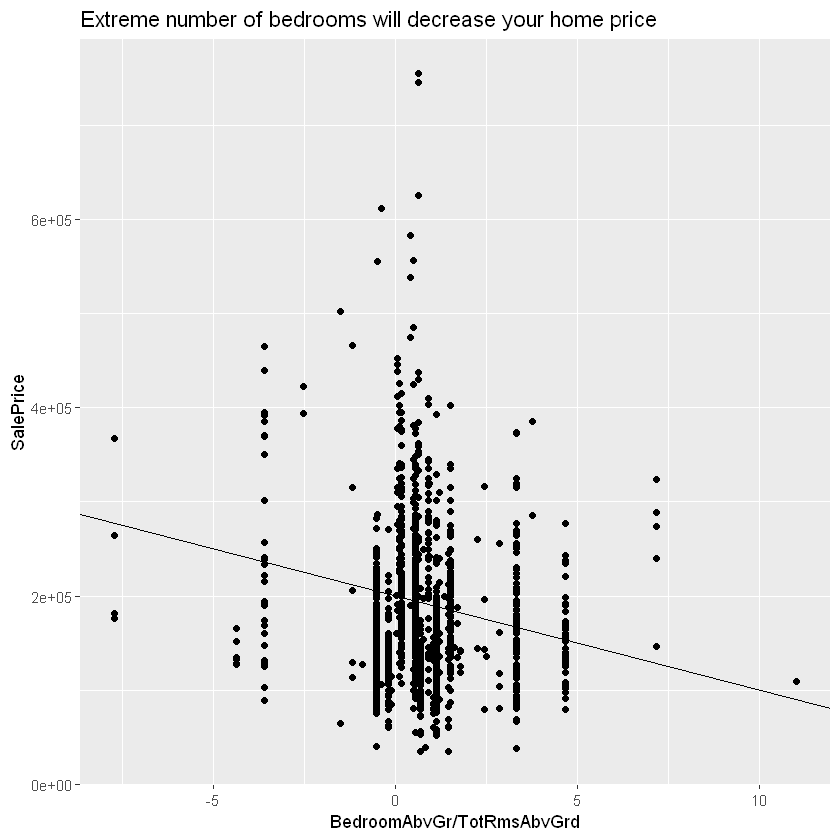

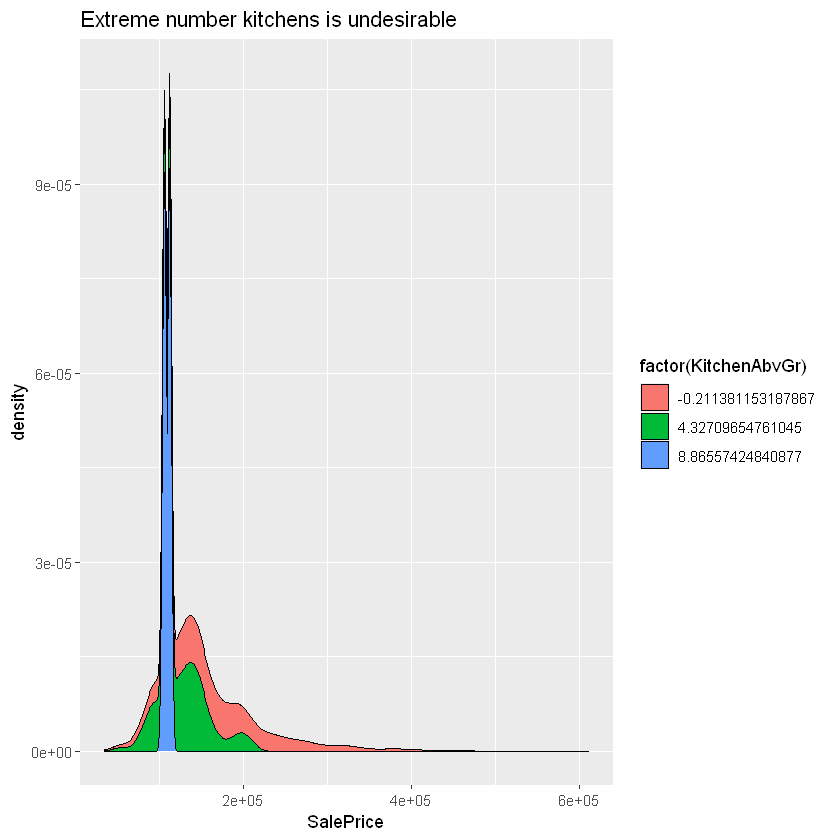

In [57]:
#AGAINST_CONVENTION 
title<-'Extreme number of bedrooms will decrease your home price'
ggplot(aes(BedroomAbvGr/TotRmsAbvGrd,SalePrice),data =nums.standard) +ggtitle(title)+ 
    geom_point()+geom_abline(intercept=2*10^5, slope=-10000)+ggsave(get.file.name('Against_Convention',title))

#too many kitchens is bad, seems like abnormal homes are undesirable
title<-'Extreme number kitchens is undesirable'
no.outlier %>% ggplot(aes( SalePrice, fill=factor(KitchenAbvGr))) + ggtitle(title)+ 
    geom_density(position="stack")+ggsave(get.file.name('Against_Convention',title))

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


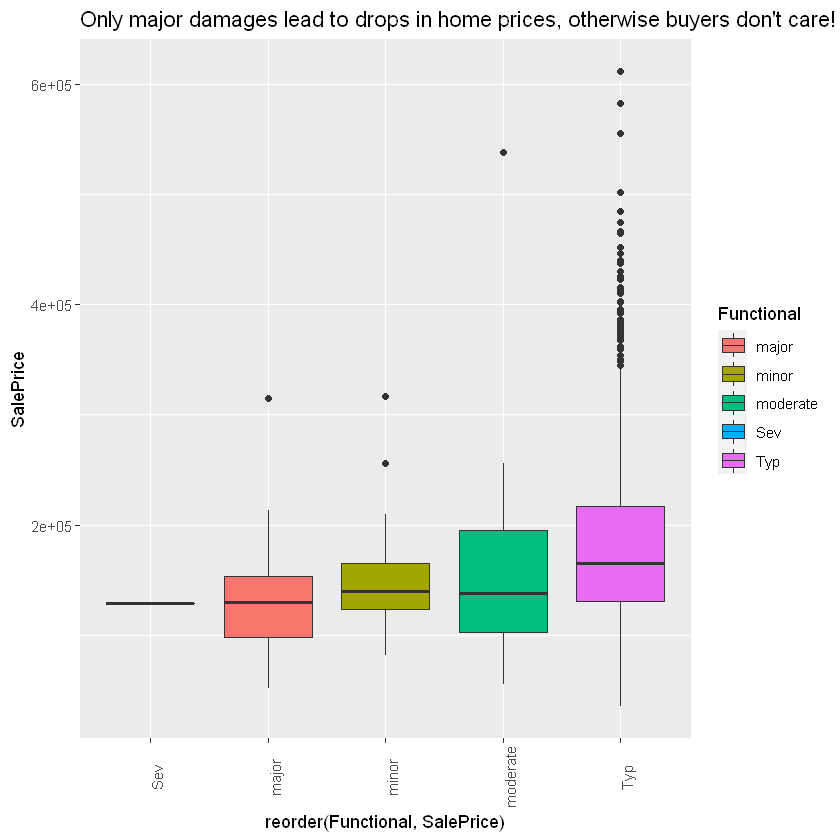

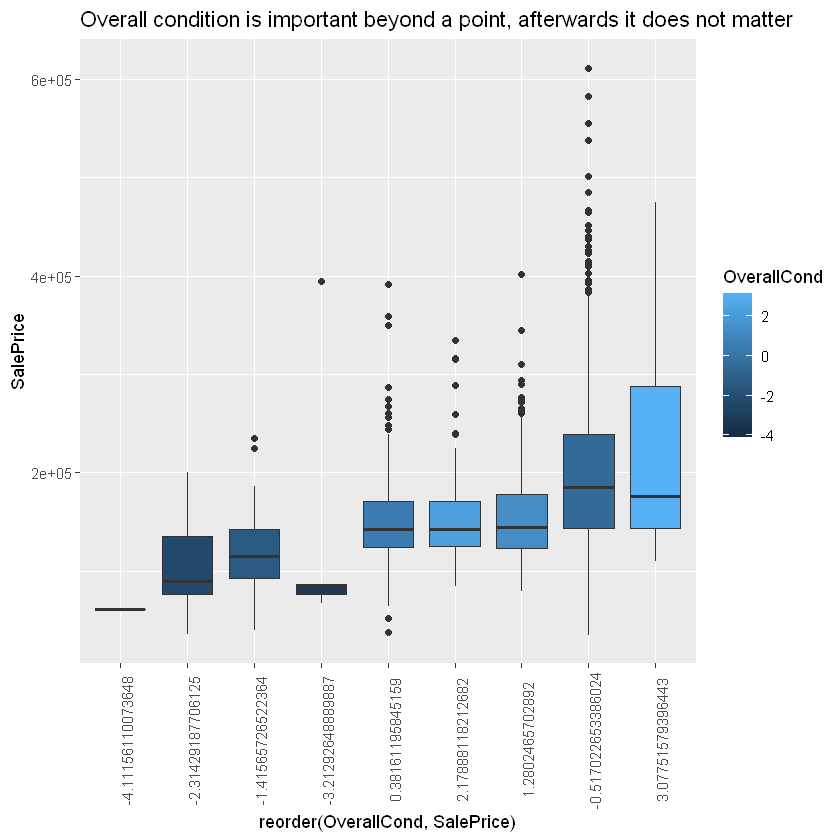

In [58]:
#CHECKLIST_PREDICTORS PREDICTORS THAT MATTER BEYOND A POINT 
title<- 'Only major damages lead to drops in home prices, otherwise buyers don\'t care!'
no.outlier %>% ggplot(aes( reorder(Functional, SalePrice), SalePrice, fill=Functional)) + ggtitle(title) +
    geom_boxplot() + theme(axis.text.x = element_text(angle = 90))+ 
    ggsave(get.file.name('CHECKLIST_PREDICTORS' , title))

#overall condition is important beyond a point, afterwards it does not matter
title<- 'Overall condition is important beyond a point, afterwards it does not matter'
no.outlier %>% ggplot(aes( reorder(OverallCond, SalePrice), SalePrice, fill=OverallCond)) +geom_boxplot()+
    ggtitle(title)+ theme(axis.text.x = element_text(angle = 90))+ ggsave(get.file.name('CHECKLIST_PREDICTORS' , title))

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


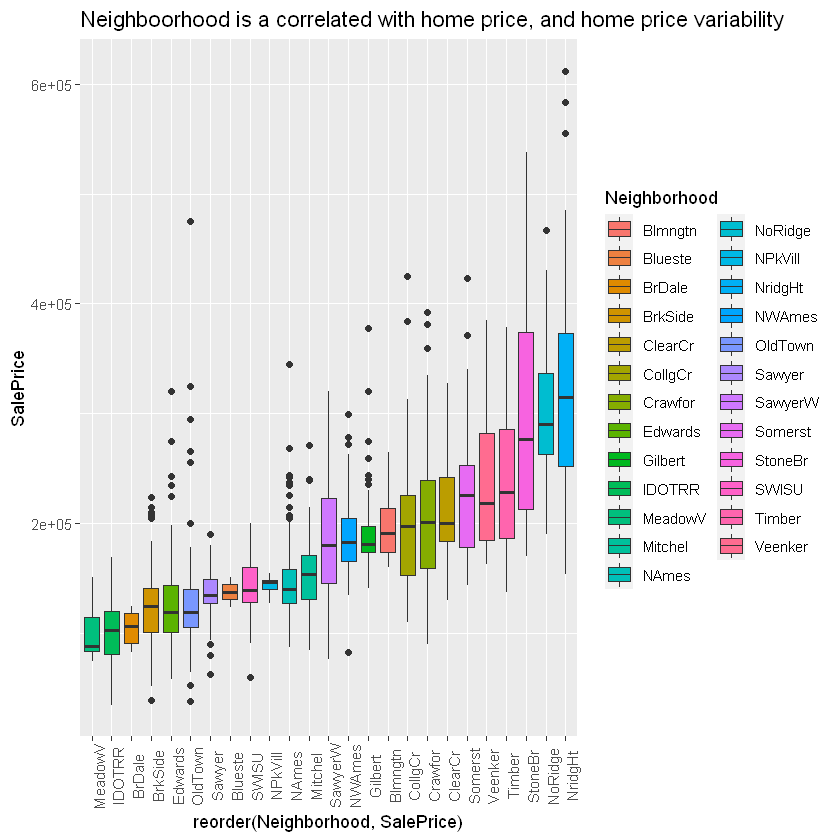

Saving 6.67 x 6.67 in image


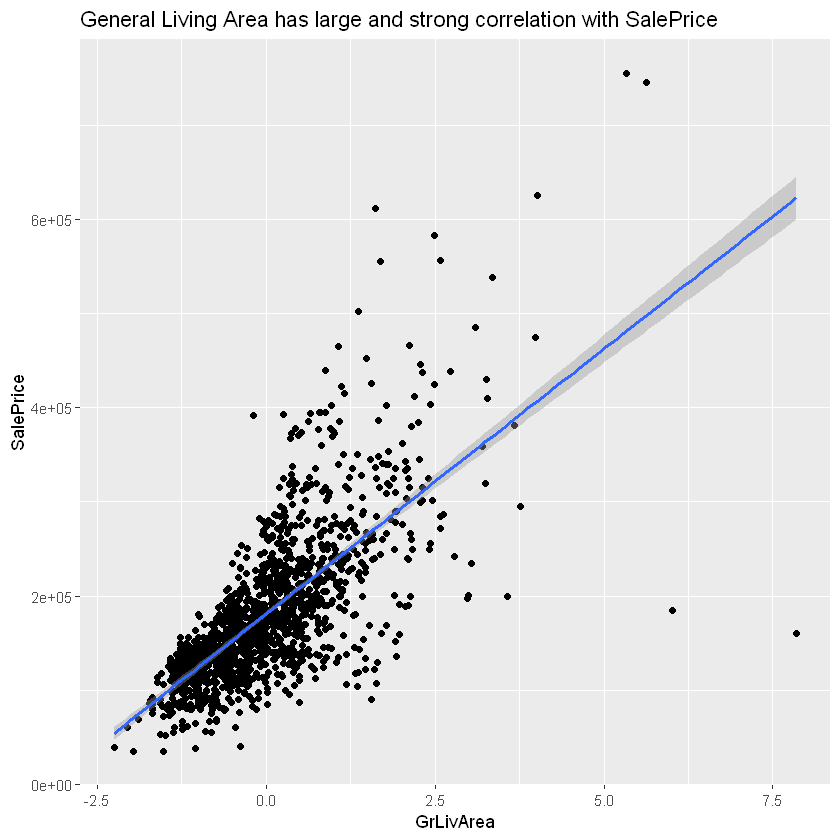

Saving 6.67 x 6.67 in image


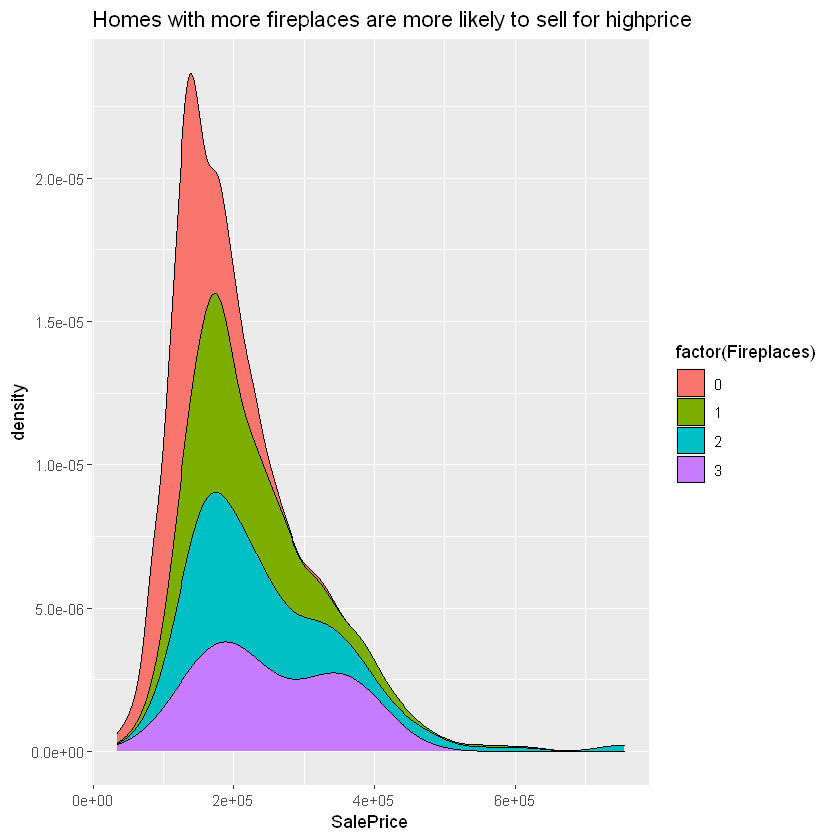

Saving 6.67 x 6.67 in image


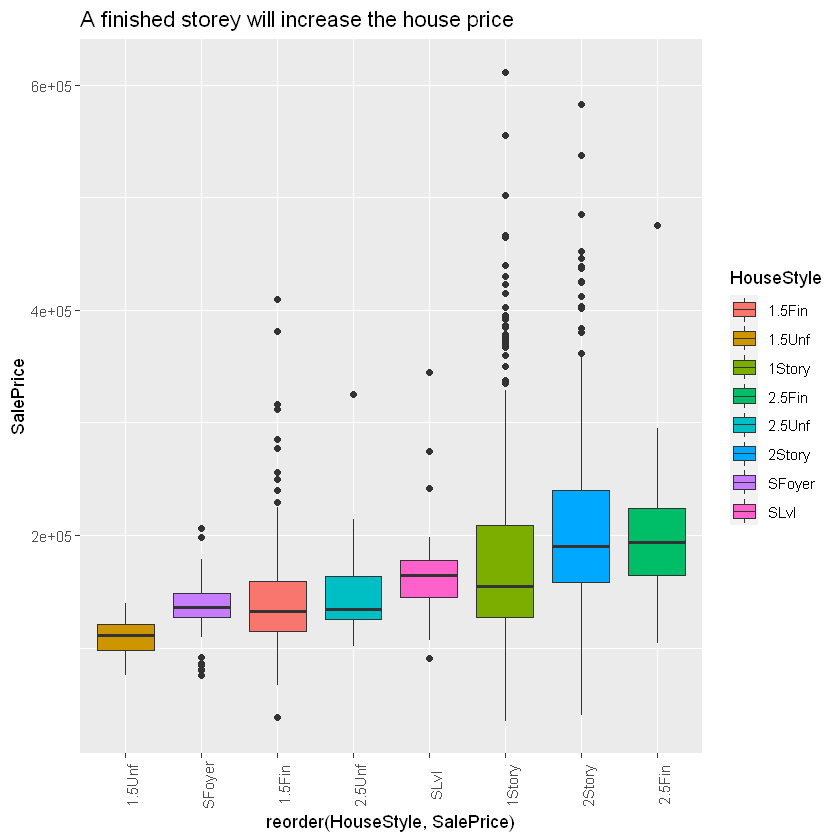

Saving 6.67 x 6.67 in image


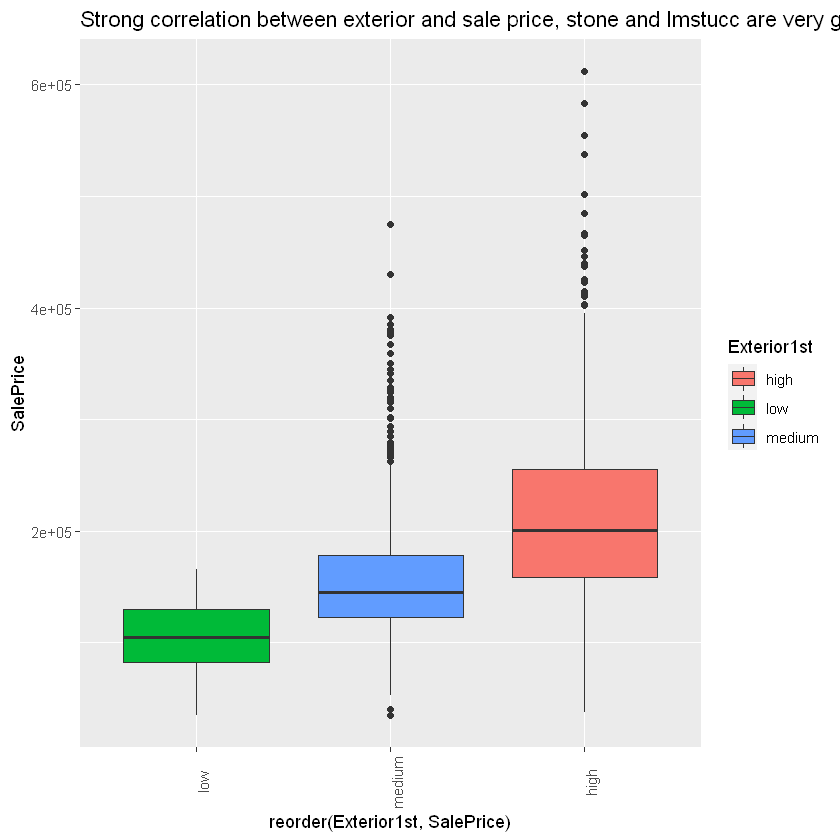

Saving 6.67 x 6.67 in image


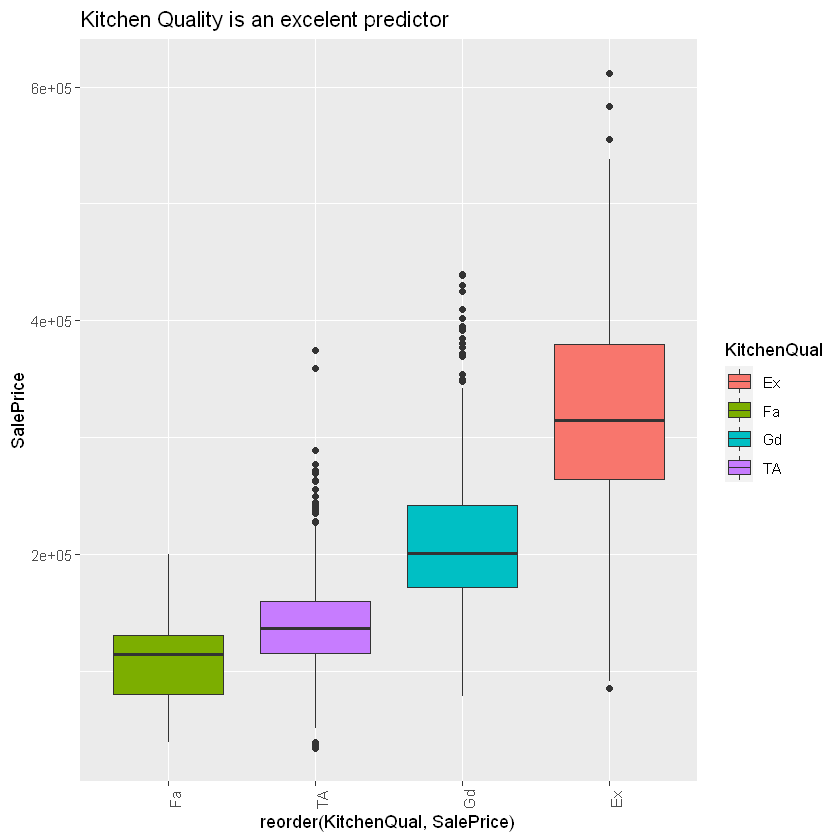

png 
  2

png 
  2

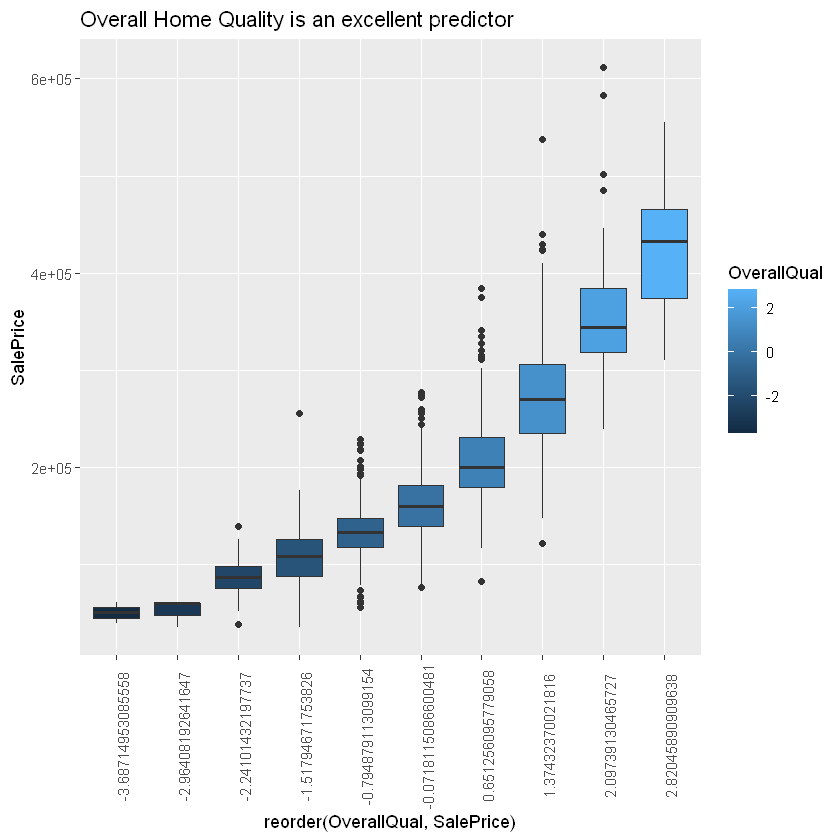

In [59]:
#STRONG PREDICTORS

#as the price within a neihbourhood increases so does the variability of the sales price
title <- 'Neighboorhood is a correlated with home price, and home price variability'
no.outlier %>% ggplot(aes( reorder(Neighborhood, SalePrice), SalePrice, fill=Neighborhood)) + ggtitle(title)+
    geom_boxplot() + theme(axis.text.x = element_text(angle = 90))+ggsave(get.file.name('Strong_Predictors',title))

title <- 'General Living Area has large and strong correlation with SalePrice'
ggplot(aes(GrLivArea,SalePrice),data =nums.standard) + 
    geom_point()+ geom_smooth(method='lm', formula= y~x)+ggtitle(title)+
    ggsave(get.file.name('Strong_Predictors', title))

title <- 'Homes with more fireplaces are more likely to sell for highprice'
ggplot(aes(SalePrice, fill=factor(Fireplaces)), data=nums) + geom_density(position="stack") + ggtitle(title)+
    ggsave(get.file.name('Strong_Predictors', title))

#unless the storeys are finished they do not help home price
title <- 'A finished storey will increase the house price'
no.outlier %>% ggplot(aes( reorder(HouseStyle, SalePrice), SalePrice, fill=HouseStyle)) +ggtitle(title)+ 
    geom_boxplot() + theme(axis.text.x = element_text(angle = 90))+
    ggsave(get.file.name('Strong_Predictors', title))

#here i suspect confounding, that better neighboorhoods have better exteriors
title <- 'Strong correlation between exterior and sale price, stone and Imstucc are very good predictors with small IQR.'
no.outlier %>% ggplot(aes( reorder(Exterior1st, SalePrice), SalePrice, fill=Exterior1st)) + geom_boxplot()+
    ggtitle(title) + theme(axis.text.x = element_text(angle = 90)) + ggsave(get.file.name('Strong_Predictors',title))

title <- 'Kitchen Quality is an excelent predictor'
no.outlier %>% ggplot(aes( reorder(KitchenQual, SalePrice), SalePrice, fill=KitchenQual)) + ggtitle(title)+
    geom_boxplot() + theme(axis.text.x = element_text(angle = 90)) +ggsave(get.file.name('Strong_Predictors',title))

title <- 'Overall Home Quality is an excellent predictor'
no.outlier %>% ggplot(aes( reorder(OverallQual, SalePrice), SalePrice, fill=OverallQual)) +geom_boxplot()+
    ggtitle(title)+theme(axis.text.x = element_text(angle = 90))+ggsave(get.file.name('Strong_Predictors',title))

title <- 'Condition1 and Condition2 are Strong Predictors'
png(get.file.name('Strong_Predictors',title))
no.outlier %>% ggplot(aes( reorder(Condition1, SalePrice), SalePrice, fill=Condition1)) +geom_boxplot()+
    theme(axis.text.x = element_text(angle = 90))
no.outlier %>% ggplot(aes( reorder(Condition2, SalePrice), SalePrice, fill=Condition2)) +geom_boxplot()+
    theme(axis.text.x = element_text(angle = 90))
dev.off()

#external quality of the home helps increase the value of the home if if is excellent or good, whatever the 
#neighrboorhood. The same is not true for external condition, which when adjusted for neighrboorhood
png(get.file.name('Strong_Predictors', 'ExterQual is an excellent predictor, ExterCond is not'))
title <- 'Regardless of Neighborhood a good/excellent quality home will help'
no.outlier %>% ggplot(aes( reorder(ExterQual, SalePrice), SalePrice, fill=ExterQual)) + ggtitle(title) +
    geom_boxplot() +facet_grid(. ~ reorder(Neighborhood, SalePrice))+ theme(axis.text.x = element_text(angle = 90))
title<- 'External condition, which when adjusted for neighborhood, does not influence price'
no.outlier %>% ggplot(aes( reorder(ExterCond, SalePrice), SalePrice, fill=ExterCond)) + ggtitle(title) +
    geom_boxplot() +facet_grid(. ~ reorder(Neighborhood, SalePrice))+ theme(axis.text.x = element_text(angle = 90))
dev.off()

         
          1.5Fin 1.5Unf 1Story 2.5Fin 2.5Unf 2Story SFoyer SLvl
  C (all)      4      0      4      0      1      1      0    0
  FV           0      0     18      0      0     47      0    0
  RH           1      1      6      1      0      6      1    0
  RL          94      6    630      4      2    319     27   62
  RM          55      7     67      3      8     66      9    3
  Unknown      0      0      0      0      0      0      0    0

Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Removed 1 rows containing missing values (position_stack)."

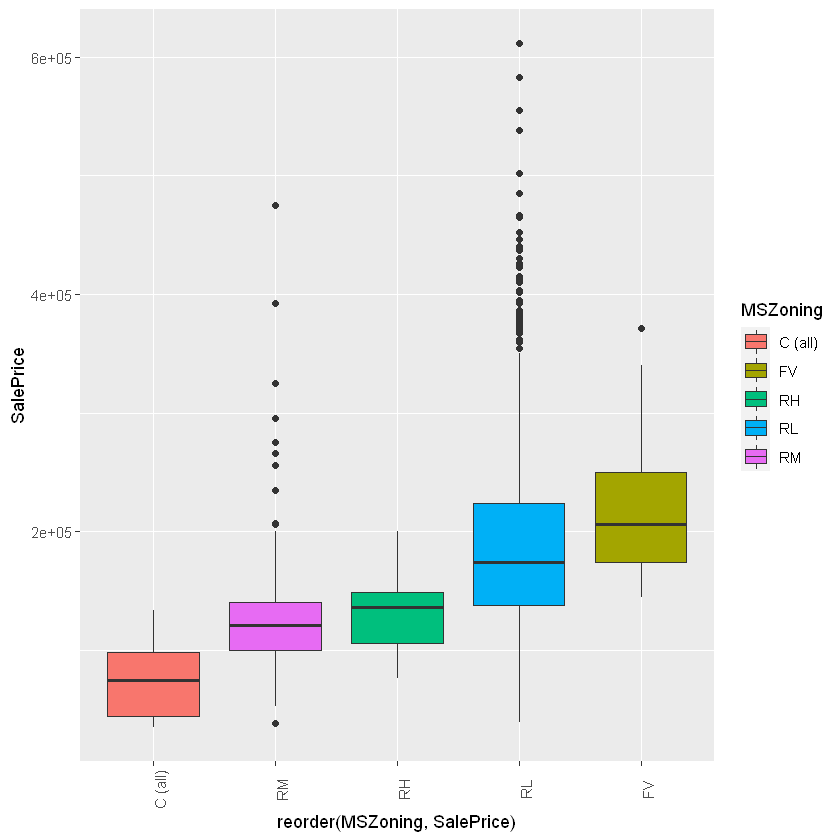

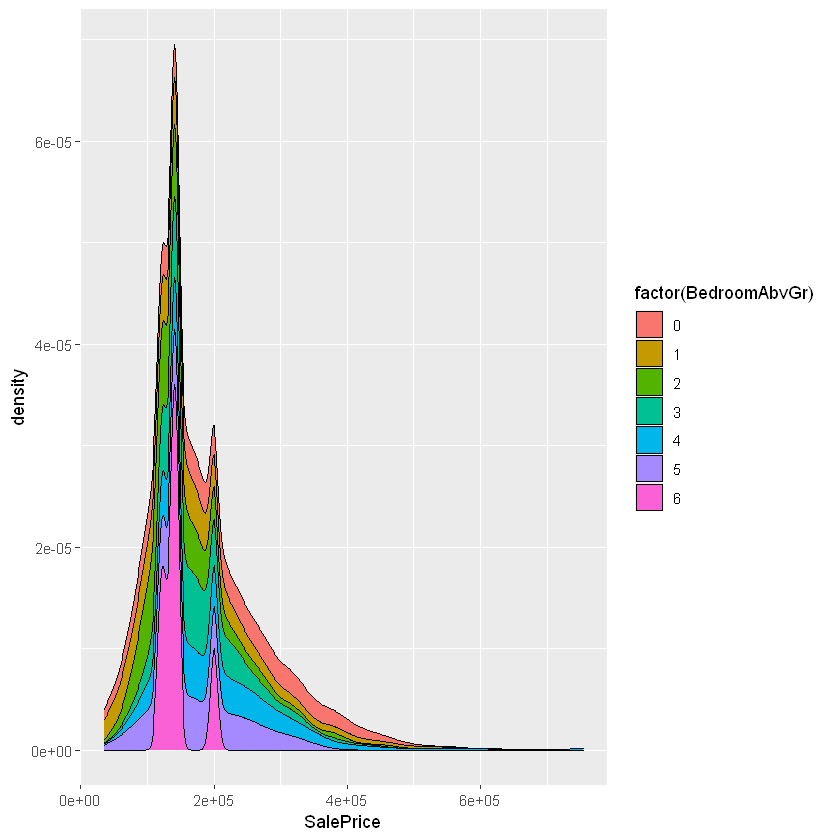

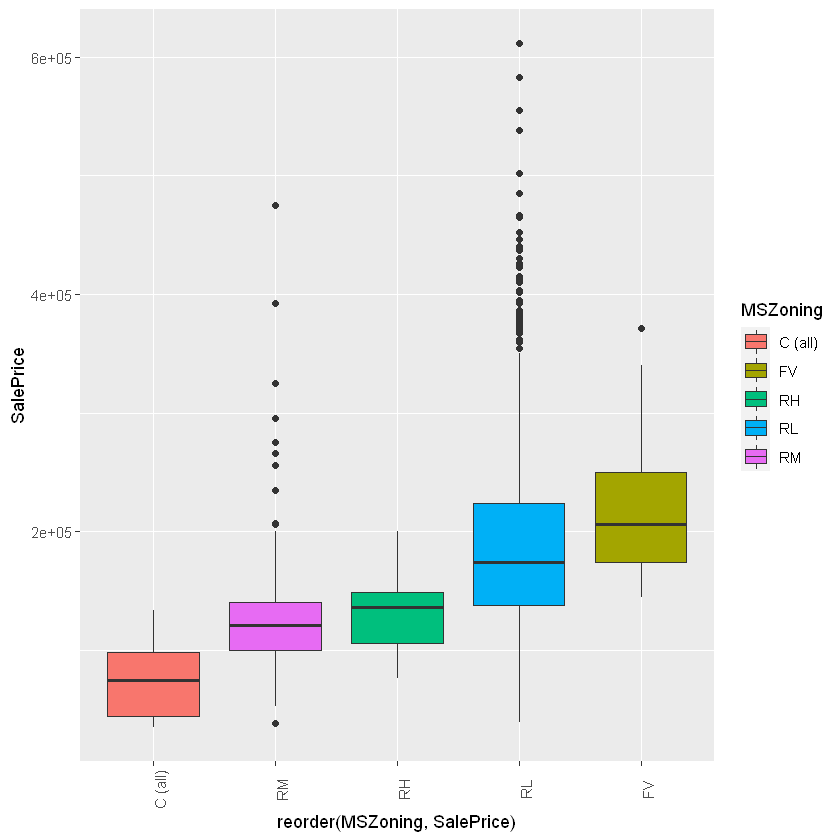

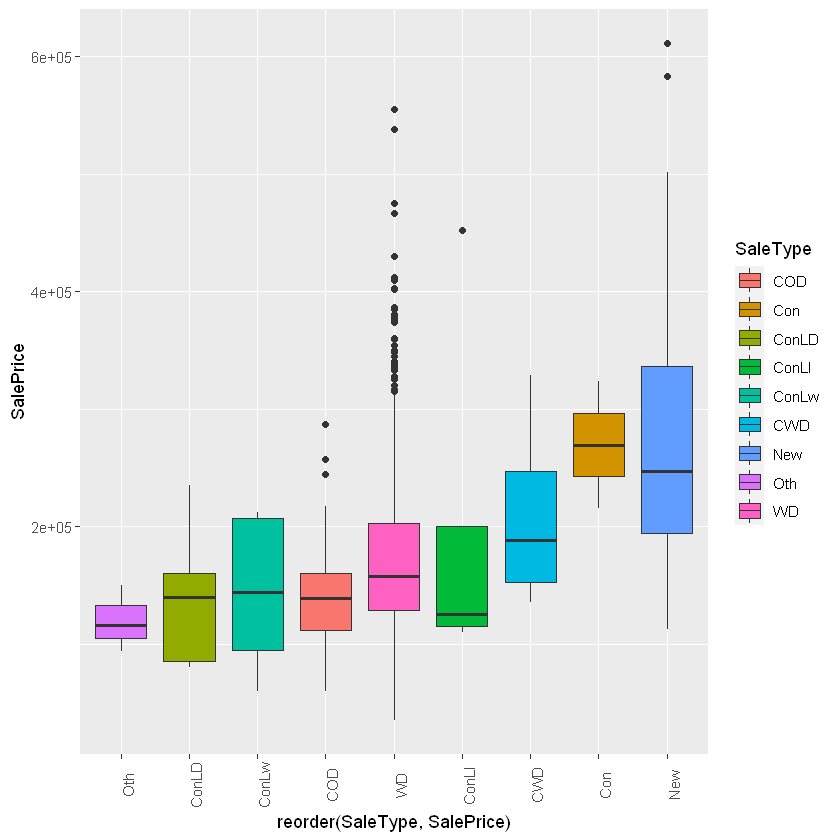

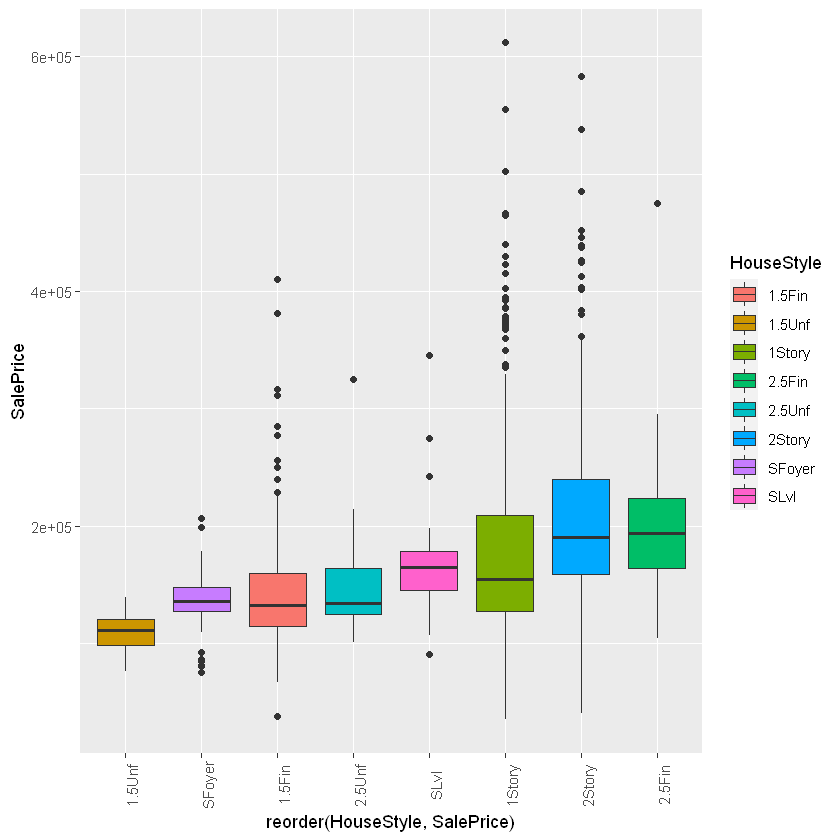

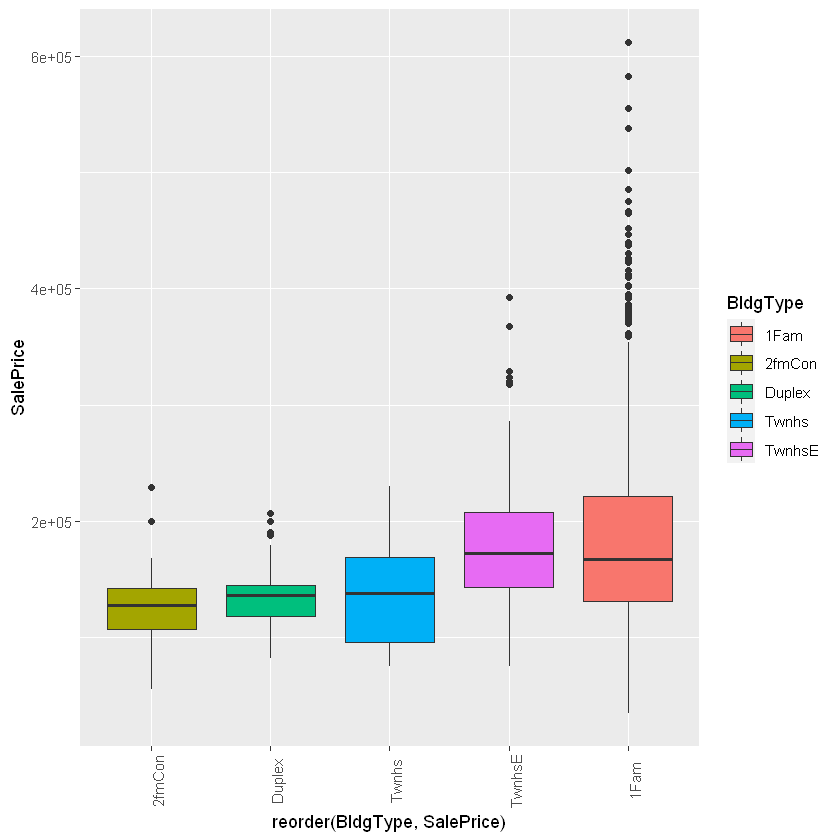

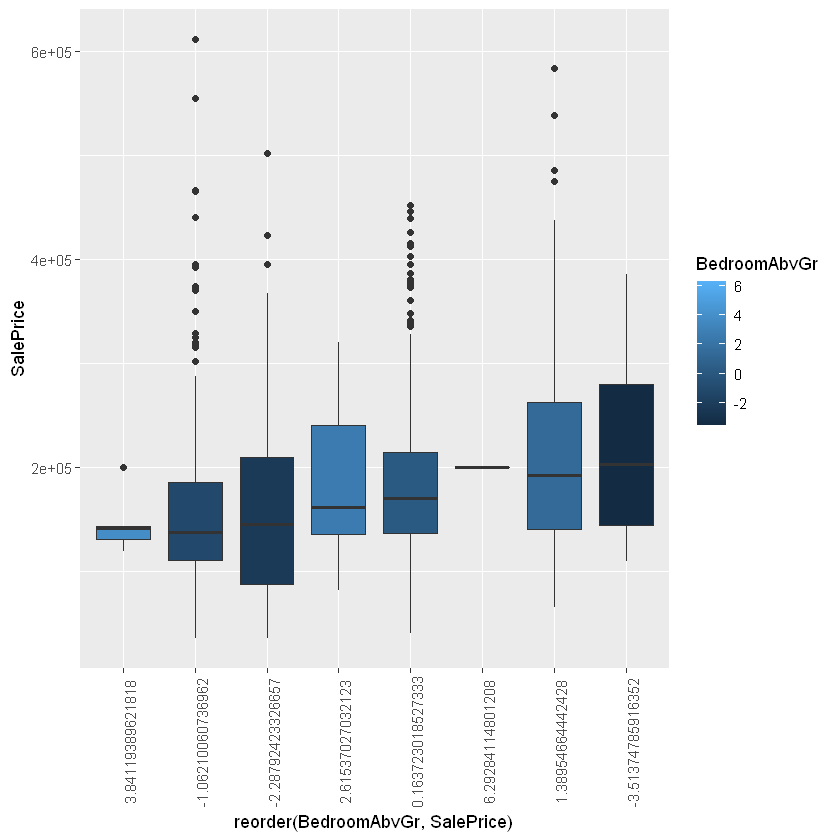

In [60]:
#MY PERSONAL FINDINGS, THESE ARE NOT TO BE EXPORTED, BUT ARE IMPORTANT

#somewhat of a correlation between zoning and sale price
no.outlier %>% ggplot(aes( reorder(MSZoning, SalePrice), SalePrice, fill=MSZoning)) + 
    geom_boxplot() + theme(axis.text.x = element_text(angle = 90))
#however when we investigate the distribution of housing style, we see that zoning such as commercial were low because they 
#tend to have 1 storey homes. Likewise floating village residents had a high housing price most likely because
#they tend to have larger homes. Only homes with Residential Low Density, can be said to confidently have a positive
#influence on house price, regardless of the house style.
table(no.outlier$MSZoning , no.outlier$HouseStyle)

#in general more bedrooms means a house is more likely to sell for a higher price
# 2 clear lumps of homes in the saleprice density graphs, rich homes and regular homes
ggplot(aes(SalePrice, fill=factor(BedroomAbvGr)), data=nums) + geom_density(position="stack")

#somewhat of a correlation between zoning and sale price
no.outlier %>% ggplot(aes( reorder(MSZoning, SalePrice), SalePrice, fill=MSZoning)) + 
    geom_boxplot() + theme(axis.text.x = element_text(angle = 90))

#obviously new homes and contracts with 15% Down payment regular terms, were the most expensive homes, the other
#contracts don't matter
no.outlier %>% ggplot(aes( reorder(SaleType, SalePrice), SalePrice, fill=SaleType)) + 
    geom_boxplot() + theme(axis.text.x = element_text(angle = 90))

#house style and building type are not super important
no.outlier %>% ggplot(aes( reorder(HouseStyle, SalePrice), SalePrice, fill=HouseStyle)) +geom_boxplot()+
    theme(axis.text.x = element_text(angle = 90))
no.outlier %>% ggplot(aes( reorder(BldgType, SalePrice), SalePrice, fill=BldgType)) +geom_boxplot()+
    theme(axis.text.x = element_text(angle = 90))

#not a significant predictor, but more bedrooms does increase home price
no.outlier %>% ggplot(aes( reorder(BedroomAbvGr, SalePrice), SalePrice, fill=BedroomAbvGr)) + 
    geom_boxplot() + theme(axis.text.x = element_text(angle = 90))


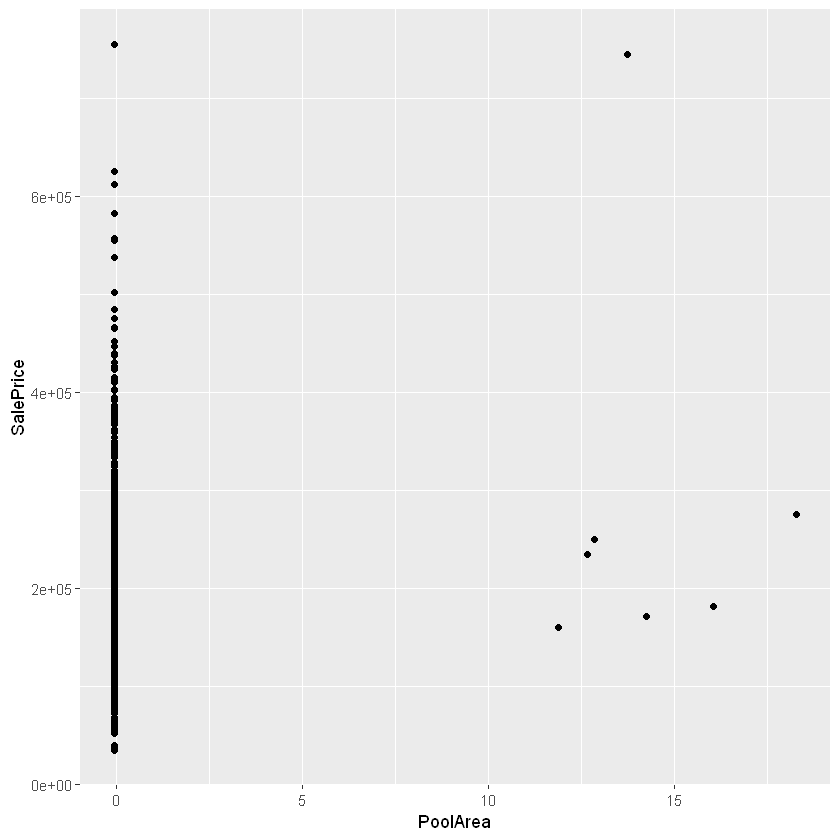

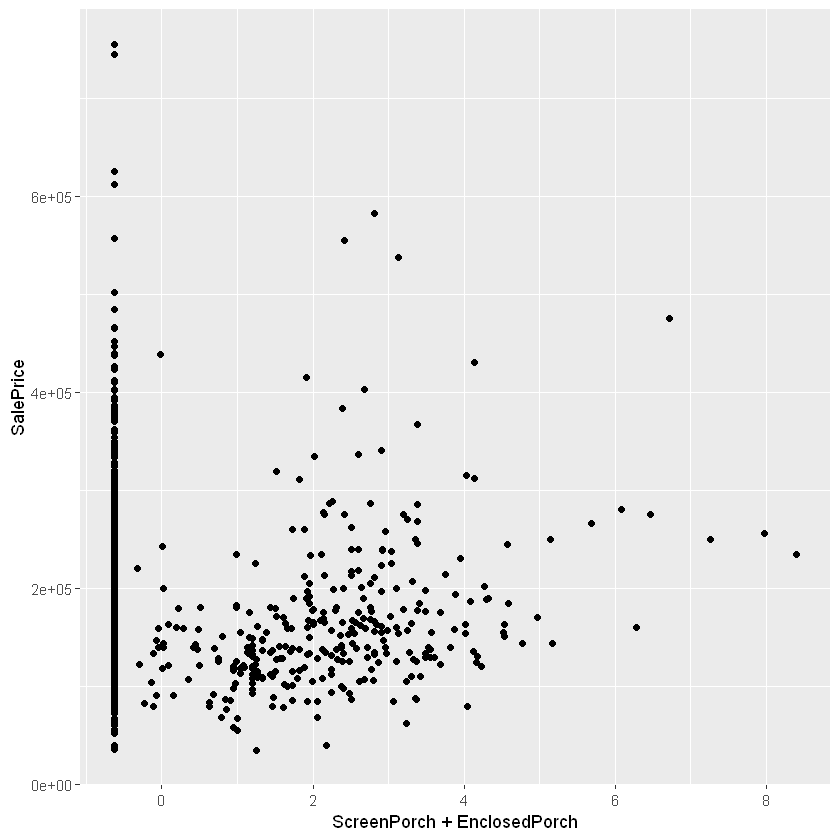

In [61]:
#VARIABLES THAT SHOULD BE DELETED
#pool area should be DELETED, shows no impact along with basically only 0 values
ggplot(aes(PoolArea,SalePrice),data =nums.standard) + geom_point()
#porch variables should be DELETED, show correlation with the saleprice, theis is the best I could do 
ggplot(aes(ScreenPorch+EnclosedPorch,SalePrice),data =nums.standard) + geom_point()

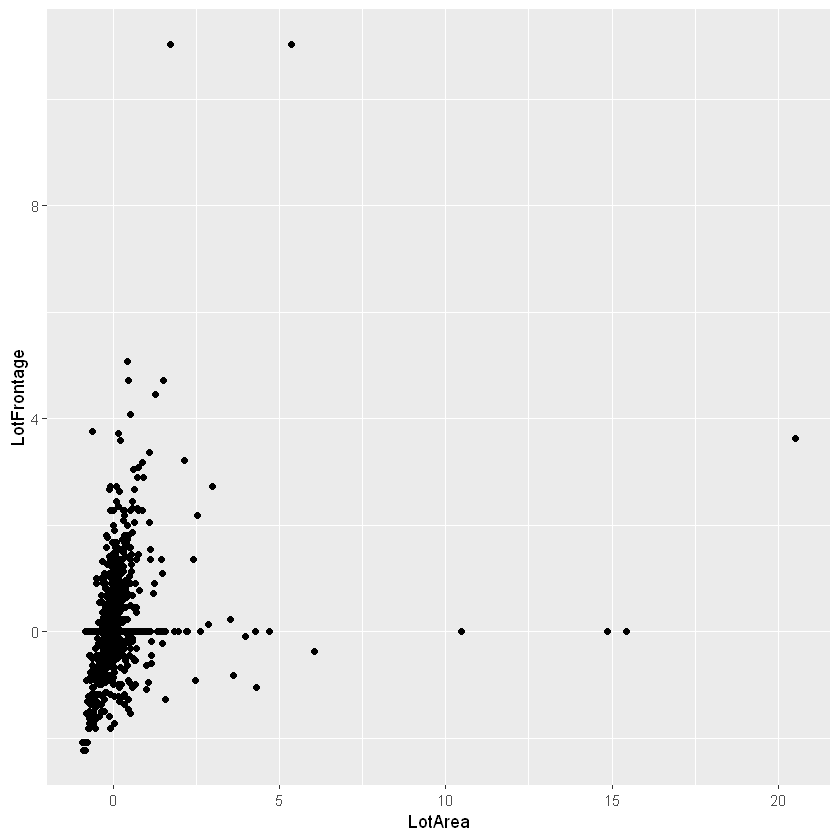

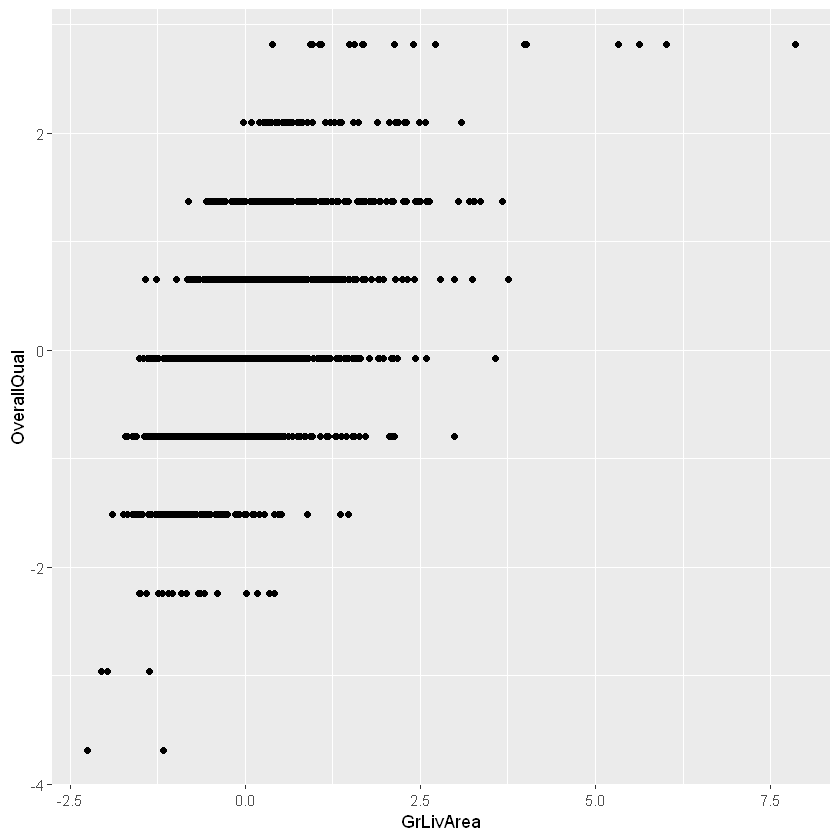

         
          1.5Fin 1.5Unf 1Story 2.5Fin 2.5Unf 2Story SFoyer SLvl
  Gar2         1      0      1      0      0      0      0    0
  Othr         0      0      1      0      0      1      0    0
  Shed        10      0     26      0      0      9      2    2
  TenC         0      0      0      0      0      1      0    0
  Unknown    143     14    697      8     11    428     35   63

`summarise()` ungrouping output (override with `.groups` argument)


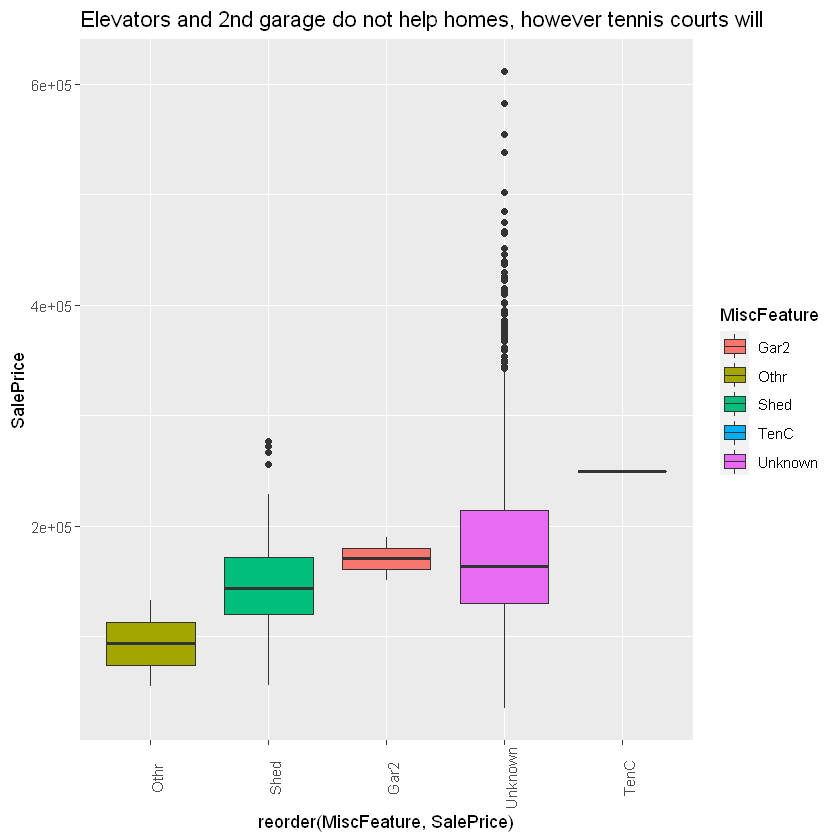

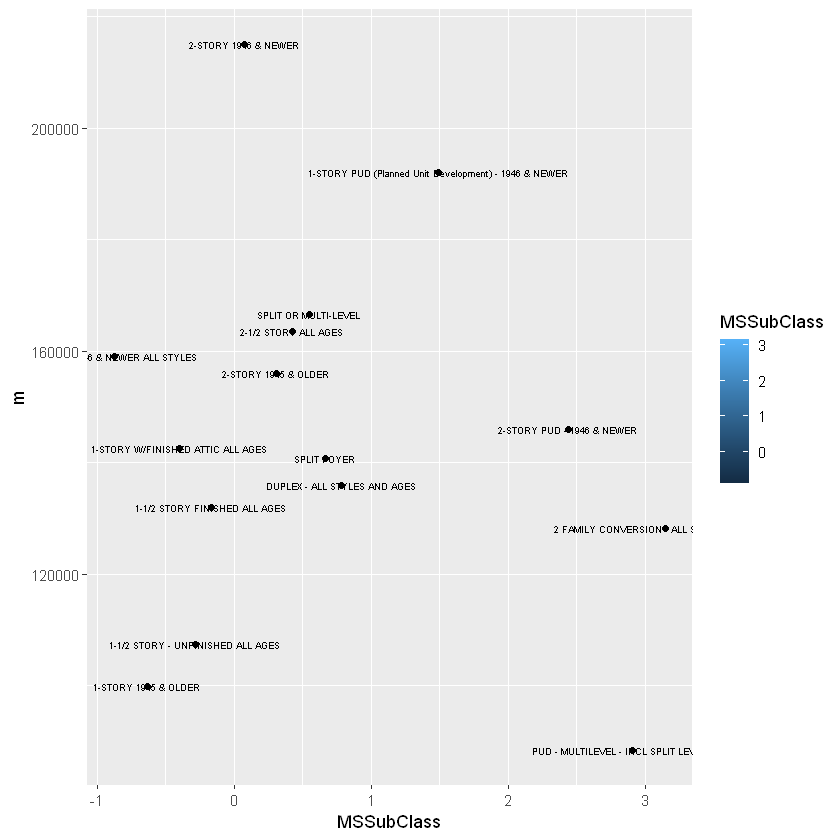

In [62]:
#MY PERSONAL GRAPHS, BASICALLY USELESS
#looks filling the na's with the mean makes makes plots with LotFrontage awkward, perhaps the variable should be deleted
ggplot(aes(LotArea,LotFrontage),data =nums.standard) + geom_point()
#weak correlation between quality and area
ggplot(aes(GrLivArea,OverallQual),data =nums.standard) + geom_point()

#these results were exposed to be confounding, also the MiscFeatures did not have enough data within the classes
title<-'Elevators and 2nd garage do not help homes, however tennis courts will'
no.outlier %>% ggplot(aes( reorder(MiscFeature, SalePrice), SalePrice, fill=MiscFeature)) + ggtitle(title) +
    geom_boxplot() + theme(axis.text.x = element_text(angle = 90))
table(no.outlier$MiscFeature, no.outlier$HouseStyle)

#two storey homes and new homes are significantly important
no.outlier %>% group_by(MSSubClass) %>%summarize(m=median(SalePrice))%>% arrange(MSSubClass) %>%  mutate(label=c(
"1-STORY 1946 & NEWER ALL STYLES",
"1-STORY 1945 & OLDER",
"1-STORY W/FINISHED ATTIC ALL AGES",
"1-1/2 STORY - UNFINISHED ALL AGES",
"1-1/2 STORY FINISHED ALL AGES",
"2-STORY 1946 & NEWER",
"2-STORY 1945 & OLDER",
"2-1/2 STORY ALL AGES",
"SPLIT OR MULTI-LEVEL",
"SPLIT FOYER",
"DUPLEX - ALL STYLES AND AGES",
"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
"2-STORY PUD - 1946 & NEWER",
"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
"2 FAMILY CONVERSION - ALL STYLES AND AGES"
)) %>%
    ggplot(aes( x=MSSubClass,y= m, fill=MSSubClass, label=label)) + geom_point()+geom_text(size=2)

In [65]:
sum(is.na(no.outlier$BldgType))

[1] 0

In [63]:
TODO
- FEATURE ENGINEER I THINK IN SEPERATE MODULE
- Find clusters to group the data by
potentially: neighboorhood, bldgtype, housetype


ERROR: Error in parse(text = x, srcfile = src): <text>:2:11: unexpected symbol
1: TODO
2: - FEATURE ENGINEER
             ^


In [ ]:
#The best predictors are factors
#hence a model that uses factors most effectively, such as random forests are the best suited model
#furthermore interaction terms may be needed, however there seems to be plentiful strong factor terms already

#There are 2 classes of variables: ones that strongly influence, and ones that do not influence salesprice
#this makes sense because when buying homes there is not significant variability in what buyers want, 
#everyone wants a normal home, with as much living area and quality as possible, and other features are irrelevant
#to these primary things. This explains why buyers are willing to overlook problems in functionality so long as the primary
#traits are available, the rest can be fixed.

#home quality > home condition, as the former will always increase sale price, while the rather will not
#abornormal homes, such as excessive kitchens and excessive bedrooms are undesirable
